In [1]:
import numpy as np
from qiskit import Aer
from qiskit import BasicAer
from qiskit import transpile 
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
from qiskit.quantum_info import Statevector
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_state_city
from qiskit.visualization import plot_bloch_multivector
from qiskit.providers.aer import QasmSimulator

In [2]:
state = Statevector.from_int(0, 2)
state.draw('latex')

<IPython.core.display.Latex object>

C:\Users\mlabadm\AppData\Local\Programs\Python\Python39\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


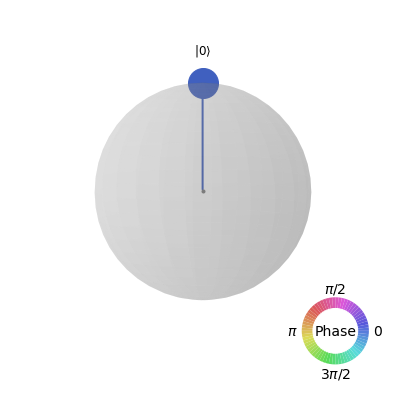

In [3]:
state.draw('qsphere')

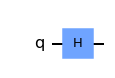

In [4]:
circ = QuantumCircuit(1)
circ.h(0)
circ.draw('mpl')

In [5]:
U = Operator(circ)
U.data

array([[ 0.70710678+0.j,  0.70710678+0.j],
       [ 0.70710678+0.j, -0.70710678+0.j]])

In [6]:
state = state.evolve(circ)
state.draw('latex')

<IPython.core.display.Latex object>

C:\Users\mlabadm\AppData\Local\Programs\Python\Python39\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


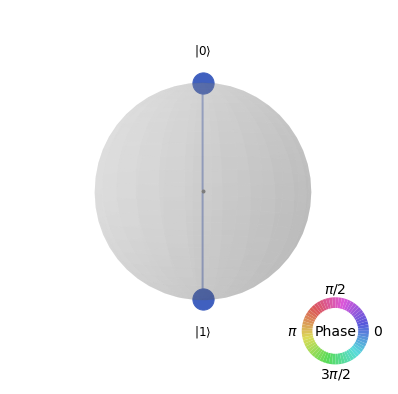

In [7]:
state.draw('qsphere')

In [8]:
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circ)
result = job.result()
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)

[0.707+0.j 0.707+0.j]


In [9]:
backend = Aer.get_backend('unitary_simulator')
job = backend.run(circ)
result = job.result()
print(result.get_unitary(circ, decimals=3))

[[ 0.707+0.j  0.707-0.j]
 [ 0.707+0.j -0.707+0.j]]


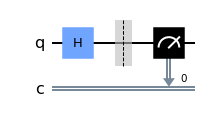

In [10]:
meas = QuantumCircuit(1, 1)
meas.barrier(range(1))
meas.measure(range(1), range(1))
qc = meas.compose(circ, range(1), front=True)
qc.draw('mpl')

In [11]:
backend = QasmSimulator()
qc_compiled = transpile(qc, backend)
job_sim = backend.run(qc_compiled, shots=1000)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)
print(counts)

{'0': 490, '1': 510}


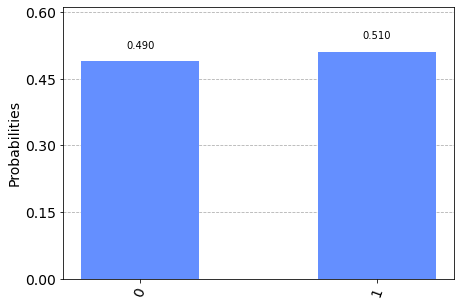

In [12]:
plot_histogram(counts)

## Fin parte 1

In [13]:
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.cx(0, 1)
meas = QuantumCircuit(2, 2)
meas.measure([0,1], [0,1])
backend = BasicAer.get_backend('qasm_simulator')
circ = bell.compose(meas)
result = backend.run(transpile(circ, backend), shots=1000).result()
counts  = result.get_counts(circ)
print(counts)

{'11': 479, '00': 521}


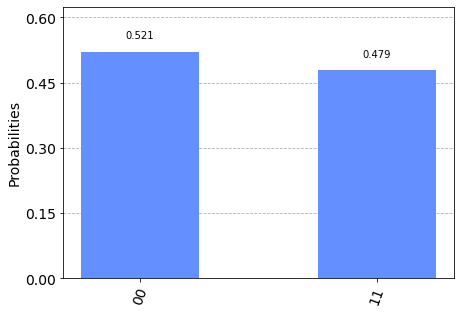

In [14]:
plot_histogram(counts)

## Fin parte 2

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer

backend = BasicAer.get_backend('unitary_simulator')

In [16]:
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.u(pi/2,pi/2,pi/2,q)
qc.draw()

┌────────────────┐
q22_0: ┤ U(π/2,π/2,π/2) ├
       └────────────────┘

In [17]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j   , -0.   -0.707j],
       [ 0.   +0.707j, -0.707+0.j   ]])

In [18]:
qc = QuantumCircuit(q)
qc.u2(pi/2,pi/2,q)
qc.draw()

C:\Users\mlabadm\AppData\Local\Temp/ipykernel_14576/3744410036.py:2: DeprecationWarning: The QuantumCircuit.u2 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You can use the general 1-qubit gate QuantumCircuit.u instead: u2(φ,λ) = u(π/2, φ, λ). Alternatively, you can decompose it interms of QuantumCircuit.p and QuantumCircuit.sx: u2(φ,λ) = p(π/2+φ) sx p(λ-π/2) (1 pulse on hardware).
  qc.u2(pi/2,pi/2,q)


┌─────────────┐
q22_0: ┤ U2(π/2,π/2) ├
       └─────────────┘

In [19]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j   , -0.   -0.707j],
       [ 0.   +0.707j, -0.707+0.j   ]])

In [20]:
qc = QuantumCircuit(q)
qc.p(pi/2,q)
qc.draw()

┌────────┐
q22_0: ┤ P(π/2) ├
       └────────┘

In [21]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j]])

In [22]:
qc = QuantumCircuit(q)
qc.id(q)
qc.draw()

┌───┐
q22_0: ┤ I ├
       └───┘

In [23]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

In [24]:
qc = QuantumCircuit(q)
qc.x(q)
qc.draw()

┌───┐
q22_0: ┤ X ├
       └───┘

In [25]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j]])

In [26]:
qc = QuantumCircuit(q)
qc.y(q)
qc.draw()

┌───┐
q22_0: ┤ Y ├
       └───┘

In [27]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])

In [28]:
qc = QuantumCircuit(q)
qc.z(q)
qc.draw()

┌───┐
q22_0: ┤ Z ├
       └───┘

In [29]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[ 1.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j]])

In [30]:
qc = QuantumCircuit(q)
qc.h(q)
qc.draw()

┌───┐
q22_0: ┤ H ├
       └───┘

In [31]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j,  0.707-0.j],
       [ 0.707+0.j, -0.707+0.j]])

In [40]:
qc = QuantumCircuit(q)
qc.rx(pi/2,q)
qc.draw()

┌─────────┐
q22_0: ┤ Rx(π/2) ├
       └─────────┘

In [41]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j   , -0.   -0.707j],
       [ 0.   -0.707j,  0.707+0.j   ]])

In [42]:
qc = QuantumCircuit(q)
qc.ry(pi/2,q)
qc.draw()

┌─────────┐
q22_0: ┤ Ry(π/2) ├
       └─────────┘

In [43]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j, -0.707+0.j],
       [ 0.707+0.j,  0.707+0.j]])

In [44]:
qc = QuantumCircuit(q)
qc.rz(pi/2,q)
qc.draw()

┌─────────┐
q22_0: ┤ Rz(π/2) ├
       └─────────┘

In [45]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[0.707-0.707j, 0.   +0.j   ],
       [0.   +0.j   , 0.707+0.707j]])

In [46]:
q = QuantumRegister(2)

In [47]:
qc = QuantumCircuit(q)
qc.cx(q[0],q[1])
qc.draw()

q96_0: ──■──
       ┌─┴─┐
q96_1: ┤ X ├
       └───┘

In [48]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]])

In [49]:
qc = QuantumCircuit(q)
qc.cy(q[0],q[1])
qc.draw()

q96_0: ──■──
       ┌─┴─┐
q96_1: ┤ Y ├
       └───┘

In [50]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.-1.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j, 0.+0.j, 0.+0.j]])

In [51]:
qc = QuantumCircuit(q)
qc.cz(q[0],q[1])
qc.draw()

q96_0: ─■─
        │ 
q96_1: ─■─

In [52]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[ 1.-0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  1.-0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.-0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j]])

In [53]:
qc = QuantumCircuit(q)
qc.ch(q[0],q[1])
qc.draw()

q96_0: ──■──
       ┌─┴─┐
q96_1: ┤ H ├
       └───┘

In [54]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[ 1.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.707+0.j,  0.   +0.j,  0.707-0.j],
       [ 0.   +0.j,  0.   +0.j,  1.   -0.j,  0.   +0.j],
       [ 0.   +0.j,  0.707+0.j,  0.   +0.j, -0.707+0.j]])

In [55]:
qc = QuantumCircuit(q)
qc.crz(pi/2,q[0],q[1])
qc.draw()

q96_0: ─────■─────
       ┌────┴────┐
q96_1: ┤ Rz(π/2) ├
       └─────────┘

In [56]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[1.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.707-0.707j, 0.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.   +0.j   , 1.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.707+0.707j]])

In [59]:
qc = QuantumCircuit(q)
qc.cu3(pi/2, pi/2, pi/2, q[0], q[1])
qc.draw()

C:\Users\mlabadm\AppData\Local\Temp/ipykernel_14576/3424027868.py:2: DeprecationWarning: The QuantumCircuit.cu3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cu method instead, where cu3(ϴ,φ,λ) = cu(ϴ,φ,λ,0).
  qc.cu3(pi/2, pi/2, pi/2, q[0], q[1])


q96_0: ─────────■─────────
       ┌────────┴────────┐
q96_1: ┤ U3(π/2,π/2,π/2) ├
       └─────────────────┘

In [60]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[ 1.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ],
       [ 0.   +0.j   ,  0.707+0.j   ,  0.   +0.j   ,  0.   -0.707j],
       [ 0.   +0.j   ,  0.   +0.j   ,  1.   -0.j   ,  0.   +0.j   ],
       [ 0.   +0.j   ,  0.   +0.707j,  0.   +0.j   , -0.707+0.j   ]])

In [61]:
qc = QuantumCircuit(q)
qc.swap(q[0], q[1])
qc.draw()

q96_0: ─X─
        │ 
q96_1: ─X─

In [62]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]])

In [63]:
q = QuantumRegister(3)

In [64]:
qc = QuantumCircuit(q)
qc.ccx(q[0], q[1], q[2])
qc.draw()

q153_0: ──■──
          │  
q153_1: ──■──
        ┌─┴─┐
q153_2: ┤ X ├
        └───┘

In [65]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

In [66]:
qc = QuantumCircuit(q)
qc.cswap(q[0], q[1], q[2])
qc.draw()

q153_0: ─■─
         │ 
q153_1: ─X─
         │ 
q153_2: ─X─

In [67]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j]])

In [68]:
q = QuantumRegister(1)
c = ClassicalRegister(1)

In [69]:
qc = QuantumCircuit(q, c)
qc.measure(q, c)
qc.draw()

┌─┐
q172_0: ┤M├
        └╥┘
  c0: 1/═╩═
         0

In [70]:
backend = BasicAer.get_backend('qasm_simulator')
job = backend.run(transpile(qc, backend))
job.result().get_counts(qc)

{'0': 1024}

In [71]:
qc = QuantumCircuit(q, c)
qc.h(q)
qc.measure(q, c)
qc.draw()

┌───┐┌─┐
q172_0: ┤ H ├┤M├
        └───┘└╥┘
  c0: 1/══════╩═
              0

In [72]:
job = backend.run(transpile(qc, backend))
job.result().get_counts(qc)

{'0': 531, '1': 493}

## Fin parte 3